In [103]:
import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt
from hazm import word_tokenize
import pandas as pd
import seaborn as sns
class NgramLanguageModel:
    
    def __init__(self, n):
        self.n = n
        self.ngrams = defaultdict(list)
#Pre-Processing
    def preprocess_text(self, text):
        cleaned_text = re.sub(r'[^\w\s۰-۹آ-ی]', ' ', text)
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
        tokens = word_tokenize(cleaned_text)
        tokens = [token.strip('.,') for token in tokens]
        return [token.lower() for token in tokens]
#Aggregation-Text
    def Aggregation(self, directory_path):
        for filename in os.listdir(directory_path):
            if filename.endswith(".txt"):
                with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
                    text = file.read()
                    tokens = self.preprocess_text(text)
                    for i in range(len(tokens) - self.n + 1):
                        ngram = tuple(tokens[i:i + self.n])
                        next_word = tokens[i + self.n] if i + self.n < len(tokens) else None
                        self.ngrams[ngram].append(next_word)
#Calculate_probability
    def calculate_probability(self, ngram, next_word, alpha=1):
        ngram_count = len(self.ngrams[ngram])
        vocabulary_size = len(set(word for ngram in self.ngrams.values() for word in ngram))

        if ngram_count == 0:
            return 1 / (vocabulary_size + alpha)

        if next_word is not None:
            next_word_count = self.ngrams[ngram].count(next_word)
            probability = (next_word_count + alpha) / (ngram_count + alpha * vocabulary_size)
            return probability
        else:
            probabilities = [(self.ngrams[ngram].count(word) + alpha) / (ngram_count + alpha * vocabulary_size) for word in set(self.ngrams[ngram])]
            return probabilities
#Create_histogram
    def create_histogram(self):
        token_counts = {}
        for ngram in self.ngrams.values():
            for token in ngram:
                if token is not None:
                    token_counts[token] = token_counts.get(token, 0) + 1

        sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)[:20]
        tokens, counts = zip(*sorted_tokens)

        plt.figure(figsize=(12, 6))
        sns.barplot(x=list(tokens), y=list(counts), palette="viridis")
        plt.title('Top 20 Token')
        plt.xlabel('Tokens')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.show()
        
    def generate_bar_chart(self):
        self.create_histogram()
#Token_statistics
    def token_statistics(self):
        total_tokens = sum(len(ngram) for ngram in self.ngrams.values())
        unique_tokens = len(set(token for ngram in self.ngrams.values() for token in ngram))
        most_common_ngrams = sorted(self.ngrams.items(), key=lambda x: len(x[1]), reverse=True)[:10]
        avg_tokens_per_ngram = total_tokens / len(self.ngrams)
        print(f"Average Tokens per N-gram: {avg_tokens_per_ngram:.2f}")
        print(f"Total Tokens: {total_tokens}")
        print("\nMost Common N-grams:")
        for i, (ngram, repetitions) in enumerate(most_common_ngrams, 1):
            print(f"{i}: {' '.join(ngram)} - Repetitions: {len(repetitions)}")
        print(f"Unique Tokens: {unique_tokens}")
#Find_probability
    def find_probability(self, expression):
        tokens = self.preprocess_text(expression)
        ngram = tuple(tokens[:self.n])
        next_word = tokens[self.n] if len(tokens) > self.n else None
        probabilities = self.calculate_probability(ngram, next_word)

        ngram_str = ' '.join(ngram)
        
        print(f"Probability of occurrence for '{ngram_str}':")

        for i, (word, prob) in enumerate(zip(set(self.ngrams[ngram]), probabilities), 1):
            print(f"{i}: '{word}' - Probability: {prob:.6f}")




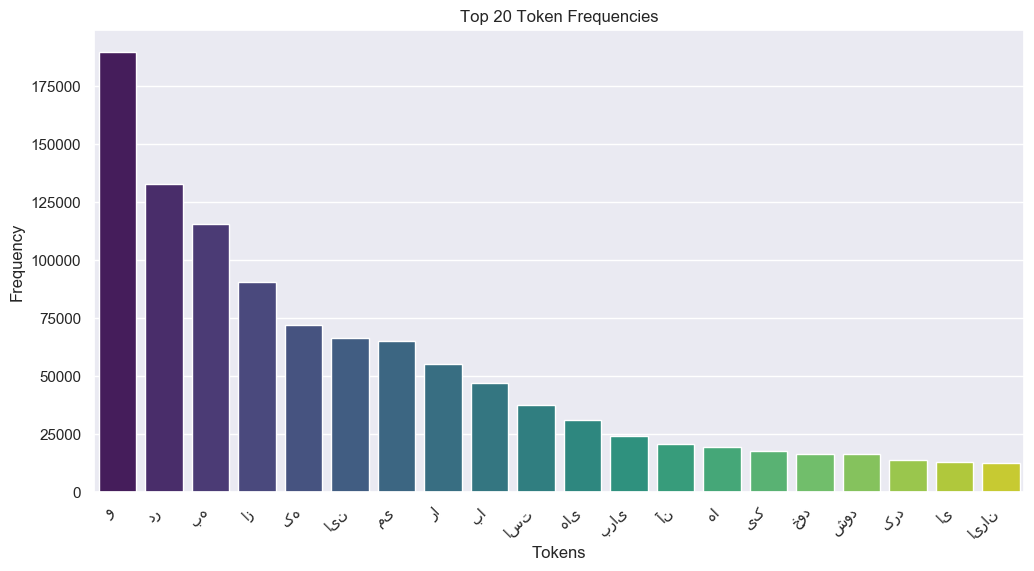

Average Tokens per N-gram: 3.23
Total Tokens: 3916760

Most Common N-grams:
1: در این - Repetitions: 11157
2: می شود - Repetitions: 10525
3: است که - Repetitions: 9322
4: که در - Repetitions: 8712
5: را به - Repetitions: 7491
6: می کند - Repetitions: 5915
7: را در - Repetitions: 5697
8: و در - Repetitions: 5579
9: خود را - Repetitions: 5310
10: از این - Repetitions: 4879
Unique Tokens: 88056
Probability of occurrence for 'در بهشت':
1: 'زهرای' - Probability: 0.000023
2: 'یا' - Probability: 0.000023
3: 'رنگ' - Probability: 0.000023
4: 'برخوردار' - Probability: 0.000023
5: 'زهرا' - Probability: 0.000114
6: 'جاری' - Probability: 0.000023


In [104]:
model = NgramLanguageModel(n=1)
model.Aggregation("/Users/danialfarsi/Desktop/NLP-Project/Ham")
model.generate_bar_chart()
model.token_statistics()
model.find_probability("در بهشت")
